In [ ]:
# tensorflow 다운그레이드  설치
!pip install tensorflow==2.3
!pip install Keras==2.3.1

     |████████████████████████████████| 320.4 MB 47 kB/s 
     |████████████████████████████████| 459 kB 62.5 MB/s 
     |████████████████████████████████| 20.1 MB 258 kB/s 
     |████████████████████████████████| 2.9 MB 24.4 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
 

In [ ]:
!pip list

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.1.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   21.1.0
arviz                         0.11.2
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.0.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4                           0.0.1
CacheControl

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc
import os
import datetime

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# 그래픽카드가 어떻게 동작하는지 확인
!nvidia-smi

Thu Sep  2 15:08:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
print(tf.__version__)


2.3.0


In [ ]:
!pip install bert-for-tf2

     |████████████████████████████████| 41 kB 170 kB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30534 sha256=8bc6f69faee18daa98b2c62331e341362d50cc91e2731401a4e80daa52b7f2c3
  Stored in directory: /root/.cache/pip/wheels/47/b6/e5/8c76ec779f54bc5c2f1b57d2200bb9c77616da83873e8acb53
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19473 sha256=e5fa7f3e2a1ec206f4190cfb8a6a9c253ce6016ac4a521cb71dac29989306b01
  Stored in directory: /root/.cache/pip/wheels/0e/fc/d2/a44fff33af0f233d7def6e7de413006d57c10e10ad736fe8f5
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7912 sha256=0c7905d57e50fe92755a69a87dc96cbf5590b103e3bcd285c49c61b2195e9401
  Stored in directory: /root/.cache/pip/wheels/e1/11/67/33cc51bbee127cb8fb2ba549cd29109b2f22da43ddf9969716
Successfully built bert-for-tf2 params-flow py-params


In [ ]:
import bert
from bert import BertModelLayer
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
from bert.tokenization.bert_tokenization import FullTokenizer

In [ ]:
# random seed 정해주기
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# wine data 불러오기
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/section4/winerecomm/winemag-data-130k-v2.csv')

# 데이터 shape 확인
df.shape

(129971, 14)

In [ ]:
#데이터 확인
display(df.head(3))
# 데이터 결측치 확인
df.info()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [ ]:
# 사용할 컬럼 선택하여 새로운 데이터셋 만들기 description, variety
df_var = df[['description', 'variety']]
df_var

,description,variety
0,"Aromas include tropical fruit, broom, brimston...",White Blend
1,"This is ripe and fruity, a wine that is smooth...",Portuguese Red
2,"Tart and snappy, the flavors of lime flesh and...",Pinot Gris
3,"Pineapple rind, lemon pith and orange blossom ...",Riesling
4,"Much like the regular bottling from 2012, this...",Pinot Noir
...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,Riesling
129967,Citation is given as much as a decade of bottl...,Pinot Noir
129968,Well-drained gravel soil gives this wine its c...,Gewürztraminer
129969,"A dry style of Pinot Gris, this is crisp with ...",Pinot Gris


In [ ]:
# 품종 26개만 확인및 선택
temp_label = df_var.variety.value_counts()
temp_label.head(26)

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
Riesling                       5189
Sauvignon Blanc                4967
Syrah                          4142
Rosé                           3564
Merlot                         3102
Nebbiolo                       2804
Zinfandel                      2714
Sangiovese                     2707
Malbec                         2652
Portuguese Red                 2466
White Blend                    2360
Sparkling Blend                2153
Tempranillo                    1810
Rhône-style Red Blend          1471
Pinot Gris                     1455
Champagne Blend                1396
Cabernet Franc                 1353
Grüner Veltliner               1345
Portuguese White               1159
Bordeaux-style White Blend     1066
Pinot Grigio                   1052
Name: variety, dtype: int64

In [ ]:
# 품종 26개에 한하여 마스킹 해주고 데이터셋 정리
mask = df_var['variety'].isin(['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend', 
                               'Bordeaux-style Red Blend', 'Riesling', 
                               'Sauvignon Blanc', 'Syrah', 'Rosé', 'Merlot','Nebbiolo', 'Zinfandel',
                               'Sangiovese', 'Malbec','Portuguese Red', 'White Blend',
                               'Sparkling Blend', 'Tempranillo','Rhône-style Red Blend', 'Pinot Gris',
                               'Champagne Blend', 'Cabernet Franc','Grüner Veltliner', 'Portuguese White',
                               'Bordeaux-style White Blend', 'Pinot Grigio'])
df_var = df_var[mask]
display(df_var.head())
display(df_var.info())


,description,variety
0,"Aromas include tropical fruit, broom, brimston...",White Blend
1,"This is ripe and fruity, a wine that is smooth...",Portuguese Red
2,"Tart and snappy, the flavors of lime flesh and...",Pinot Gris
3,"Pineapple rind, lemon pith and orange blossom ...",Riesling
4,"Much like the regular bottling from 2012, this...",Pinot Noir


<class 'pandas.core.frame.DataFrame'>
Int64Index: 101285 entries, 0 to 129969
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   description  101285 non-null  object
 1   variety      101285 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


None

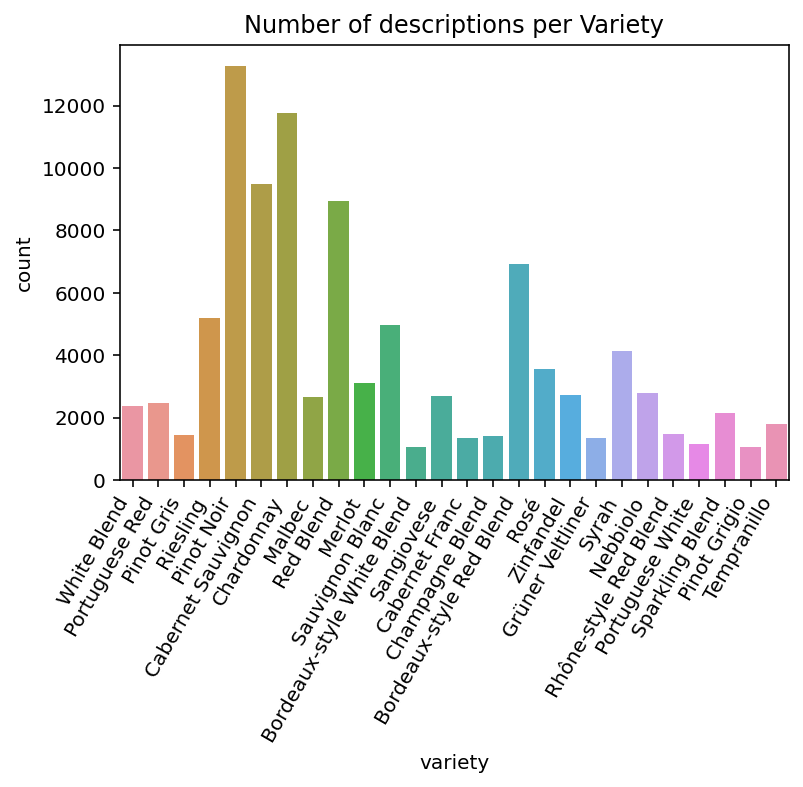

In [ ]:
chart = sns.countplot(df_var.variety)
plt.title("Number of descriptions per Variety")
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, horizontalalignment='right');

In [ ]:
# train, test 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_var.description, df_var.variety, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((81028,), (20257,), (81028,), (20257,))

In [ ]:
# 라벨과 텍스트를 데이터프레임으로 만들어주기
train = {'text':X_train, 'intent':y_train}
df_train = pd.DataFrame(train)
display(df_train.head())
test = {'text':X_test, 'intent':y_test}
df_test = pd.DataFrame(test)
display(df_test.head())


,text,intent
52836,"This medium-bodied, silky blend should drink w...",Rhône-style Red Blend
70483,Despite coming from the even-keeled 2012 vinta...,Merlot
67524,"Savory as a weathered leather chair, this vint...",Syrah
22812,"Based in the Aube in southern Champagne, Flute...",Champagne Blend
53191,"A very fine Cabernet, rich, ripe and complex, ...",Cabernet Sauvignon


,text,intent
49332,This is one of the best red wines at this pric...,Red Blend
15533,"Pure Syrah from Pepper Bridge, Seven Hills and...",Syrah
72730,"Sourced from all over the Napa Valley, this wi...",Cabernet Sauvignon
111041,This two-acre site dates back to 1975; this is...,Pinot Noir
35290,"Young and herbaceous, it has lemon, peach and ...",Sauvignon Blanc


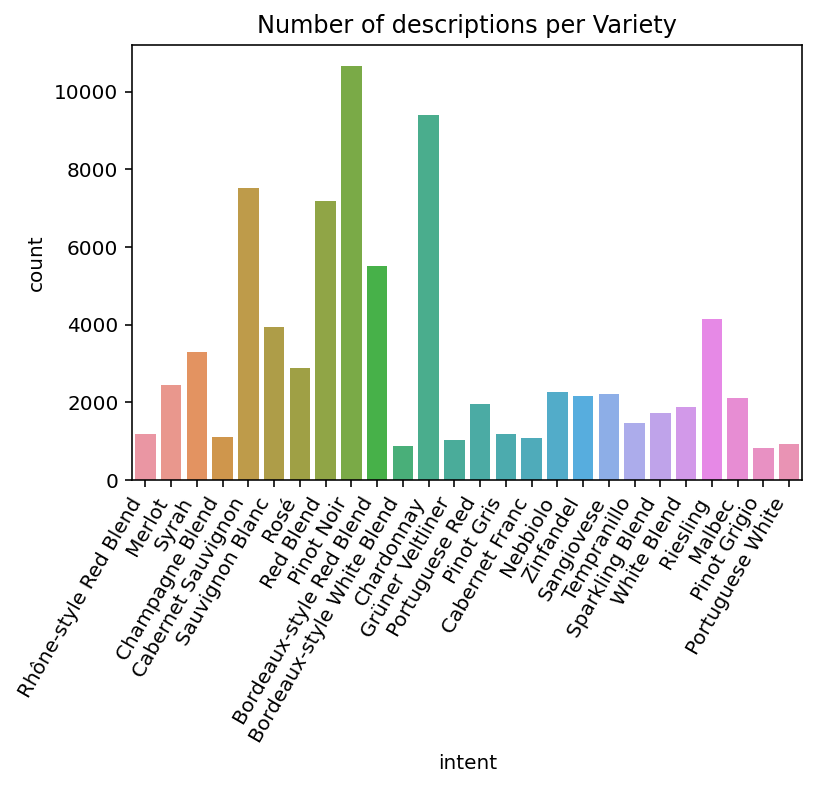

In [ ]:
chart = sns.countplot(df_train.intent)
plt.title("Number of descriptions per Variety")
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, horizontalalignment='right');

In [ ]:
# 학습할 데이터 수 맞춰주기 기준 Pinot Grigio
pinot_grigio_df = df_train[df_train['intent']== 'Pinot Grigio']

# 나머지도 진행
pinot_noir_df = df_train[df_train['intent']=='Pinot Noir']
chardonnay_df = df_train[df_train['intent']=='Chardonnay']
cabernet_sauvignon_df = df_train[df_train['intent']=='Cabernet Sauvignon']
chardonnay_df = df_train[df_train['intent']=='Chardonnay']
red_blend_df = df_train[df_train['intent']=='Red Blend']
bordeaux_style_red_blend_df = df_train[df_train['intent']=='Bordeaux-style Red Blend']
riesling_df = df_train[df_train['intent']=='Riesling']
sauvignon_blanc_df = df_train[df_train['intent']=='Sauvignon Blanc']
syrah_df =  df_train[df_train['intent']=='Syrah']
rose_df = df_train[df_train['intent']=='Rosé']
merlot_df = df_train[df_train['intent']== 'Merlot']
nebblolo_df = df_train[df_train['intent']=='Nebbiolo']
zinfandel_df= df_train[df_train['intent']== 'Zinfandel']
sangiovese_df = df_train[df_train['intent'] == 'Sangiovese']
malbec_df = df_train[df_train['intent'] =='Malbec']
portuguese_red_df =df_train[df_train['intent'] == 'Portuguese Red']
white_blend_df = df_train[df_train['intent'] == 'White Blend']
sparkling_blend_df = df_train[df_train['intent']=='Sparkling Blend']
tempranillo_df = df_train[df_train['intent'] =='Tempranillo']
rhône_style_red_blend_df = df_train[df_train['intent'] == 'Rhône-style Red Blend']
pinot_girs_df = df_train[df_train['intent'] == 'Pinot Gris']
champagne_blend_df = df_train[df_train['intent'] == 'Champagne Blend']
carbenet_fran_df = df_train[df_train['intent'] == 'Cabernet Franc']
grüner_veltliner_df = df_train[df_train['intent'] == 'Grüner Veltliner']
portuguese_white_df = df_train[df_train['intent'] == 'Portuguese White']
bordeaux_style_white_blend_df = df_train[df_train['intent'] == 'Bordeaux-style White Blend']


In [ ]:
display(pinot_grigio_df)
display(riesling_df)

,text,intent
93928,Punggl is a very expressive Pinot Grigio (one ...,Pinot Grigio
16944,This copper-colored Pinot Grigio opens with ar...,Pinot Grigio
59728,"Inviting aromas of toasted almond, pear and a ...",Pinot Grigio
41314,"Here's an informal, easygoing white that offer...",Pinot Grigio
48036,Part of a wine series made from indigenous var...,Pinot Grigio
...,...,...
74361,"This Grigio offers ripe notes of mature melon,...",Pinot Grigio
57689,This oak-aged expression of Pinot Grigio is co...,Pinot Grigio
43039,Its mix of heady aromas include chamomile flow...,Pinot Grigio
90118,Here is a luscious and generous white wine fro...,Pinot Grigio


,text,intent
11793,A perfumed whiff of citrus blossoms introduces...,Riesling
51932,"As with Kiona's off-dry Washington Riesling, t...",Riesling
97157,"The green apple, apple skin and flower aromas ...",Riesling
3389,Lemon pith and ripe peach aromas are clouded u...,Riesling
25325,"Loaded with ripe tropical fruit, this user-fri...",Riesling
...,...,...
47655,The faintest hint of fir honey appears on the ...,Riesling
99113,Fresh orange peels lend a zesty vibe to summer...,Riesling
46168,The nose is shy but promises development with ...,Riesling
53542,Exceptionally light feet make this delicate sp...,Riesling


In [ ]:
# pinot grigio와 데이터 길이를 맞춘다
pinot_grigio_df = pinot_grigio_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)

pinot_noir_df = pinot_noir_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
cabernet_sauvignon_df = cabernet_sauvignon_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
chardonnay_df = chardonnay_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
red_blend_df = red_blend_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
bordeaux_style_red_blend_df = bordeaux_style_red_blend_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
riesling_df = riesling_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
sauvignon_blanc_df = sauvignon_blanc_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
syrah_df =  syrah_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
rose_df = rose_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
merlot_df = merlot_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
nebblolo_df = nebblolo_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
zinfandel_df= zinfandel_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
sangiovese_df = sangiovese_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
malbec_df = malbec_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
portuguese_red_df = portuguese_red_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
white_blend_df = white_blend_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
sparkling_blend_df = sparkling_blend_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
tempranillo_df = tempranillo_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
rhône_style_red_blend_df = rhône_style_red_blend_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
pinot_girs_df = pinot_girs_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
champagne_blend_df = champagne_blend_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
carbenet_fran_df = carbenet_fran_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
grüner_veltliner_df = grüner_veltliner_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
portuguese_white_df = portuguese_white_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)
bordeaux_style_white_blend_df = bordeaux_style_white_blend_df.sample(n=len(pinot_grigio_df), random_state=RANDOM_SEED)

In [ ]:
riesling_df

,text,intent
34259,"Earth, apple and citrus align on the nose. The...",Riesling
127223,It's a pleasure to see another winery determin...,Riesling
91111,"Rich, ruddy peach and tangerine scents are fle...",Riesling
128988,From the single vineyard Engelreich—which tran...,Riesling
52962,"Enormously sweet, this decadent dessert wine h...",Riesling
...,...,...
99839,Pristine white grapefruit and peach flavors re...,Riesling
51984,"The winery has stuck with a deeply austere, pe...",Riesling
56985,"While dry in style, this wine is chock full of...",Riesling
47167,"Dark, smoky earth notes and savory dried herbs...",Riesling


In [ ]:
# 모든 데이터 합쳐서 하나로 만들기
pinot_grigio_df = pinot_grigio_df.append(pinot_noir_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(chardonnay_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(cabernet_sauvignon_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(red_blend_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(bordeaux_style_red_blend_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(riesling_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(sauvignon_blanc_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(syrah_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(rose_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(merlot_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(nebblolo_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(zinfandel_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(sangiovese_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(malbec_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(portuguese_red_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(white_blend_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(sparkling_blend_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(tempranillo_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(rhône_style_red_blend_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(pinot_girs_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(champagne_blend_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(carbenet_fran_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(grüner_veltliner_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(portuguese_white_df).reset_index(drop=True)
pinot_grigio_df = pinot_grigio_df.append(bordeaux_style_white_blend_df).reset_index(drop=True)

df_train = pinot_grigio_df
df_train.shape

(21762, 2)

,text,intent
0,"Surprisingly silky on the palate, this approac...",Pinot Grigio
1,"Subtle aromas of smoke, Bartlett pear and Gran...",Pinot Grigio
2,This is a rich and well-concentrated Pinot Gri...,Pinot Grigio
3,"An eye-catching, conversation-starting color o...",Pinot Grigio
4,This rosé gets its pretty eye-of-the-partridge...,Pinot Grigio


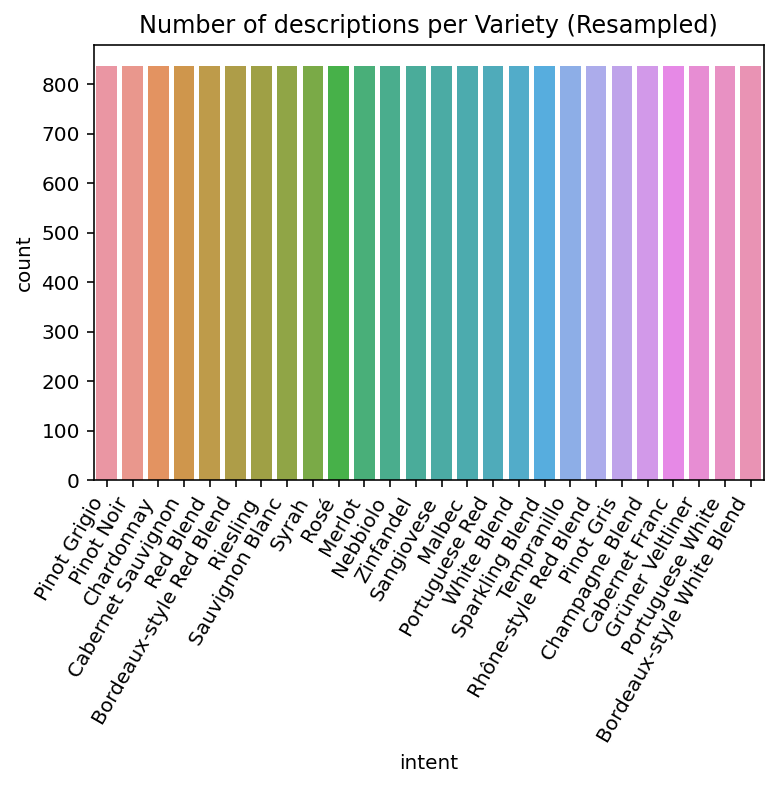

In [ ]:
chart = sns.countplot(df_train.intent)
plt.title("Number of descriptions per Variety (Resampled)")
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, horizontalalignment='right');
display(df_train.head())

In [ ]:
# 데이터 shuffling & index 리셋
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_train

,text,intent
0,This bubbly brings a rich buttery Chardonnay f...,Sparkling Blend
1,"Aromas of grilled herb, roasted hazelnut and c...",Nebbiolo
2,"Livio Felluga adds a creamy, sophisticated edg...",Pinot Grigio
3,A good Pinot Noir for everyday drinking. It's ...,Pinot Noir
4,This fruity and sweet bubbly has a vivid hot-p...,Sparkling Blend
...,...,...
21757,"Blueberry and red currant fruit flavors, augme...",Malbec
21758,"Light and dilute, this is a pleasant wine, sof...",Bordeaux-style White Blend
21759,Whiffs of savory herb and smoke fade into buoy...,Riesling
21760,"Aromas of black raspberry, black cherry and a ...",Pinot Noir


# 사전 학습된 구글 APi의 Word clustering for BERT 불러오기

### 참고 url

https://storage.googleapis.com/bert-wsd-vis/demo/index.html?#word=lie

https://github.com/google-research/bert

https://www.kdnuggets.com/2020/02/intent-recognition-bert-keras-tensorflow.html



In [ ]:
#사전학습 모델 자겨오기
!wget https://storage.googleapis.com/bert_models/2019_05_30/wwm_uncased_L-24_H-1024_A-16.zip

--2021-09-02 15:11:20--  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.193.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip’

uncased_L-12_H-768_ 100%[===================>] 388.84M   254MB/s    in 1.5s    

2021-09-02 15:11:22 (254 MB/s) - ‘uncased_L-12_H-768_A-12.zip’ saved [407727028/407727028]



In [ ]:
#사전학습 모델 unzip
!unzip wwm_uncased_L-24_H-1024_A-16

Archive:  uncased_L-12_H-768_A-12.zip
   creating: uncased_L-12_H-768_A-12/
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: uncased_L-12_H-768_A-12/vocab.txt  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: uncased_L-12_H-768_A-12/bert_config.json  


In [ ]:
# model 폴더 만들기
os.makedirs("model", exist_ok=True)

In [ ]:
#model폴더로 이동 
!mv wwm_uncased_L-24_H-1024_A-16/ model

In [ ]:
!pip install tqdm


In [ ]:
!pip install sentencepiece


     |████████████████████████████████| 1.2 MB 5.0 MB/s 


In [ ]:
from tqdm import tqdm

https://github.com/tqdm/tqdm

In [ ]:
# BERT 모델 불러오기
bert_model_name="wwm_uncased_L-24_H-1024_A-16"
# checkpoint 사용
bert_ckpt_dir = os.path.join("model/", bert_model_name)
bert_ckpt_file = os.path.join(bert_ckpt_dir, "bert_model.ckpt")
bert_config_file = os.path.join(bert_ckpt_dir, "bert_config.json")

In [ ]:
# 토큰화 하기
class IntentDetectionData:
    DATA_COLUMN = "text"
    LABEL_COLUMN = "intent"

    def __init__(self, train, test, tokenizer: FullTokenizer, classes, max_seq_len=192):
        self.tokenizer = tokenizer
        self.max_seq_len = 0
        self.classes = classes

        train, test = map(lambda df: df.reindex(df[IntentDetectionData.DATA_COLUMN].str.len().sort_values().index), [train, test])

        ((self.train_x, self.train_y), (self.test_x, self.test_y)) = map(self._prepare, [train, test])

        print("max seq_len", self.max_seq_len)
        self.max_seq_len = min(self.max_seq_len, max_seq_len)
        self.train_x, self.test_x = map(self._pad, [self.train_x, self.test_x])

    def _prepare(self, df):
        x, y = [], []

        for _, row in tqdm(df.iterrows()):
            text, label = row[IntentDetectionData.DATA_COLUMN], row[IntentDetectionData.LABEL_COLUMN]
            tokens = self.tokenizer.tokenize(text)
            tokens = ["[CLS]"] + tokens + ["[SEP]"]
            token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
            self.max_seq_len = max(self.max_seq_len, len(token_ids))
            x.append(token_ids)
            y.append(self.classes.index(label))

        return np.array(x), np.array(y)

    def _pad(self, ids):
        x = []
        for input_ids in ids:
            input_ids = input_ids[:min(len(input_ids), self.max_seq_len - 2)]
            input_ids = input_ids + [0] * (self.max_seq_len - len(input_ids))
            x.append(np.array(input_ids))
        return np.array(x)


In [ ]:
# bert dir에서 vocab file 가져와서 tokenizer로 넣기
tokenizer = FullTokenizer(vocab_file=os.path.join(bert_ckpt_dir, "vocab.txt"))

In [ ]:
tokenizer.tokenize("I love french conventional wine")

['i', 'love', 'french', 'conventional', 'wine']

In [ ]:
tokens = tokenizer.tokenize("I would like to be a Data Analyst!")
display(tokens)
tokenizer.convert_tokens_to_ids(tokens)

['i', 'would', 'like', 'to', 'be', 'a', 'data', 'analyst', '!']

[1045, 2052, 2066, 2000, 2022, 1037, 2951, 12941, 999]

In [ ]:
# 모델 만들기
# from tensorflow.python.keras.engine.input_spec import InputSpec
from tensorflow.keras.layers import InputSpec 

def create_model(max_seq_len, bert_ckpt_file):
    with tf.io.gfile.GFile(bert_config_file, "r") as reader:
        bc = StockBertConfig.from_json_string(reader.read())
        bert_params = map_stock_config_to_params(bc)
        bert_params.adapter_size = None
        bert = BertModelLayer.from_params(bert_params, name="bert")
    # input_spec = keras.layers.InputSpec(shape=(max_seq_len, ),ndim=3)
    input_ids = keras.layers.Input(shape=(max_seq_len, ), name="input_ids", dtype='int32')
    #  Input(shape, batch_size, name, dtype, sparse, tensor, ragged, type_spec, **kwargs
    # input_ids = keras.layers.Input(shape=(max_seq_len, ), dtype='int32', name="input_ids")
    bert_output = bert(input_ids)


    print("bert shape", bert_output.shape)

    # layers 쌓기 tanh함수를 이용 softmax로 출력층 설계
    cls_out = keras.layers.Lambda(lambda seq: seq[:, 0, :])(bert_output)
    cls_out = keras.layers.Dropout(0.5)(cls_out)
    logits = keras.layers.Dense(units=768, activation="tanh")(cls_out)
    logits = keras.layers.Dropout(0.5)(logits)
    logits = keras.layers.Dense(units=len(w_classes), activation="softmax")(logits)

    model = keras.Model(inputs=input_ids, outputs=logits)
    model.build(input_shape=(None, max_seq_len))

    load_stock_weights(bert, bert_ckpt_file)

    return model


In [ ]:
# train데이터의 intent 컬럼의 라벨 리스트로 만들기
display(df_train.intent.unique().tolist())
w_classes = df_train.intent.unique().tolist()
print('-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-')
# data 에서 mask된단어들(w_classes) 찾아 토큰화해주는 함수 불러오기
data = IntentDetectionData(df_train, df_test, tokenizer, w_classes, max_seq_len=128)

['Sparkling Blend',
 'Nebbiolo',
 'Pinot Grigio',
 'Pinot Noir',
 'Chardonnay',
 'White Blend',
 'Grüner Veltliner',
 'Champagne Blend',
 'Malbec',
 'Riesling',
 'Portuguese Red',
 'Bordeaux-style White Blend',
 'Cabernet Franc',
 'Rosé',
 'Pinot Gris',
 'Bordeaux-style Red Blend',
 'Red Blend',
 'Zinfandel',
 'Syrah',
 'Rhône-style Red Blend',
 'Sauvignon Blanc',
 'Tempranillo',
 'Merlot',
 'Portuguese White',
 'Sangiovese',
 'Cabernet Sauvignon']

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


21762it [00:19, 1123.84it/s]
20257it [00:18, 1094.94it/s]


max seq_len 174


In [ ]:
# 토큰화된 데이터 색인 체크
display (data.train_x.shape)
print('*-*-*-*-*-*-*-*-*-*-*-')
display(data.train_x[0])
print('*-*-*-*-*-*-*-*-*-*-*-')
display(data.train_y[0])
print('*-*-*-*-*-*-*-*-*-*-*-')
display(data.max_seq_len)

(21762, 128)

*-*-*-*-*-*-*-*-*-*-*-


array([ 101, 2200, 2422, 1010, 2071, 2471, 2022, 1037, 3123, 1012,  102,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0])

*-*-*-*-*-*-*-*-*-*-*-


24

*-*-*-*-*-*-*-*-*-*-*-


128

In [ ]:
model = create_model(data.max_seq_len, bert_ckpt_file)

bert shape (None, 128, 768)
Done loading 196 BERT weights from: model/uncased_L-12_H-768_A-12/bert_model.ckpt into <bert.model.BertModelLayer object at 0x7f69eef48410> (prefix:bert). Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from checkpoint: 
	bert/embeddings/token_type_embeddings
	bert/pooler/dense/bias
	bert/pooler/dense/kernel
	cls/predictions/output_bias
	cls/predictions/transform/LayerNorm/beta
	cls/predictions/transform/LayerNorm/gamma
	cls/predictions/transform/dense/bias
	cls/predictions/transform/dense/kernel
	cls/seq_relationship/output_bias
	cls/seq_relationship/output_weights


In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_ids (InputLayer)       [(None, 128)]             0         
_________________________________________________________________
bert (BertModelLayer)        (None, 128, 768)          108890112 
_________________________________________________________________
lambda (Lambda)              (None, 768)               0         
_________________________________________________________________
dropout (Dropout)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 768)               590592    
_________________________________________________________________
dropout_1 (Dropout)          (None, 768)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 26)               

In [ ]:
# model compile  하기
# model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.compile(
  optimizer=keras.optimizers.Adam(1e-5),
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

In [ ]:
# 학습 진행
history = model.fit(
    x=data.train_x, 
    y=data.train_y,
    validation_split=0.2,
    batch_size=16,
    shuffle=True,
    epochs=20,
    )

Epoch 1/20
1225/1225 [==============================] - 424s 346ms/step - loss: 3.1860 - acc: 0.1340 - val_loss: 2.9591 - val_acc: 0.3762
Epoch 2/20
1225/1225 [==============================] - 413s 337ms/step - loss: 2.9178 - acc: 0.4200 - val_loss: 2.7863 - val_acc: 0.5379
Epoch 3/20
1225/1225 [==============================] - 413s 337ms/step - loss: 2.8090 - acc: 0.5218 - val_loss: 2.7538 - val_acc: 0.5714
Epoch 4/20
1225/1225 [==============================] - 413s 337ms/step - loss: 2.7524 - acc: 0.5786 - val_loss: 2.6969 - val_acc: 0.6275
Epoch 5/20
1225/1225 [==============================] - 412s 336ms/step - loss: 2.7103 - acc: 0.6184 - val_loss: 2.6636 - val_acc: 0.6601
Epoch 6/20
1225/1225 [==============================] - 412s 336ms/step - loss: 2.6792 - acc: 0.6495 - val_loss: 2.6463 - val_acc: 0.6798
Epoch 7/20
1225/1225 [==============================] - 412s 336ms/step - loss: 2.6551 - acc: 0.6745 - val_loss: 2.6325 - val_acc: 0.6895
Epoch 8/20
1225/1225 [============

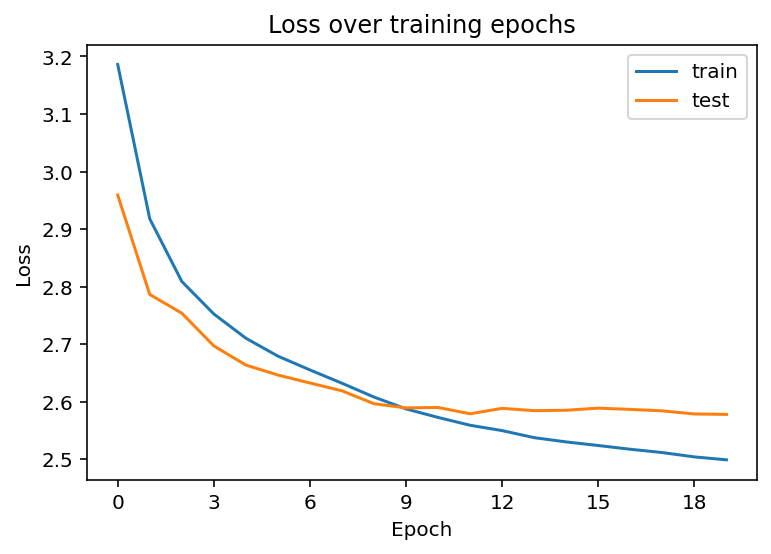

In [ ]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Loss over training epochs')
plt.show();

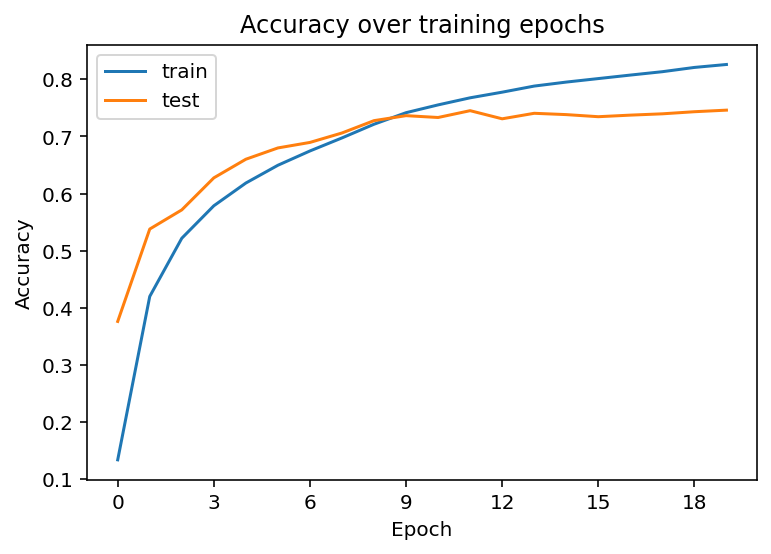

In [ ]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['acc'])
ax.plot(history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Accuracy over training epochs')
plt.show();

In [ ]:
_, train_acc = model.evaluate(data.train_x, data.train_y)
_, test_acc = model.evaluate(data.test_x, data.test_y)

print("train acc", train_acc)
print("test acc", test_acc)

634/634 [==============================] - 108s 170ms/step - loss: 2.6881 - acc: 0.6351
train acc 0.8359525799751282
test acc 0.6351384520530701


In [ ]:
y_pred = model.predict(data.test_x)

In [ ]:
y_pred

In [ ]:
y_pred = y_pred.argmax(axis=-1)
y_pred
#ref. https://stackoverflow.com/questions/47435526/what-is-the-meaning-of-axis-1-in-keras-argmax#47436103

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(data.test_y, y_pred, target_names=w_classes))

                            precision    recall  f1-score   support

           Sparkling Blend       0.57      0.81      0.67       437
                  Nebbiolo       0.74      0.77      0.75       546
              Pinot Grigio       0.43      0.74      0.54       215
                Pinot Noir       0.83      0.62      0.71      2611
                Chardonnay       0.88      0.61      0.72      2350
               White Blend       0.63      0.74      0.68       484
          Grüner Veltliner       0.68      0.81      0.74       303
           Champagne Blend       0.57      0.76      0.65       277
                    Malbec       0.89      0.40      0.55       537
                  Riesling       0.90      0.70      0.79      1042
            Portuguese Red       0.41      0.89      0.56       496
Bordeaux-style White Blend       0.30      0.74      0.43       193
            Cabernet Franc       0.28      0.53      0.37       277
                      Rosé       0.75      0.76

In [ ]:
# confusion matrix로 결과 확인
cm = confusion_matrix(data.test_y, y_pred)
df_cm = pd.DataFrame(cm, index=w_classes, columns=w_classes)

In [ ]:
df_cm

,Sparkling Blend,Nebbiolo,Pinot Grigio,Pinot Noir,Chardonnay,White Blend,Grüner Veltliner,Champagne Blend,Malbec,Riesling,Portuguese Red,Bordeaux-style White Blend,Cabernet Franc,Rosé,Pinot Gris,Bordeaux-style Red Blend,Red Blend,Zinfandel,Syrah,Rhône-style Red Blend,Sauvignon Blanc,Tempranillo,Merlot,Portuguese White,Sangiovese,Cabernet Sauvignon
Sparkling Blend,356,0,5,7,11,10,1,12,0,4,2,3,0,12,2,0,0,1,1,0,3,2,0,5,0,0
Nebbiolo,3,418,0,6,1,0,0,0,0,0,0,0,8,0,0,0,0,1,8,0,1,7,2,0,90,1
Pinot Grigio,2,1,159,0,6,14,0,1,0,5,0,1,1,1,9,0,0,2,0,0,9,0,1,3,0,0
Pinot Noir,25,14,0,1619,13,2,3,32,0,1,141,5,75,57,2,78,15,108,92,23,16,74,128,1,19,68
Chardonnay,97,0,68,16,1430,79,7,69,0,30,10,123,4,7,92,6,0,5,2,0,115,13,5,168,0,4
White Blend,16,0,27,0,20,360,8,2,0,4,1,12,0,6,14,0,0,1,0,1,8,1,0,3,0,0
Grüner Veltliner,2,0,3,0,1,6,245,1,0,5,0,6,1,0,11,0,0,0,0,0,12,0,0,10,0,0
Champagne Blend,29,0,1,0,4,0,0,211,0,0,2,9,1,12,0,0,0,0,0,0,2,0,0,6,0,0
Malbec,2,1,0,9,0,1,0,1,213,0,38,0,11,3,0,15,5,13,19,1,1,165,27,0,3,9
Riesling,14,2,27,2,26,36,65,5,0,733,1,25,1,6,39,1,0,0,0,0,45,2,0,12,0,0


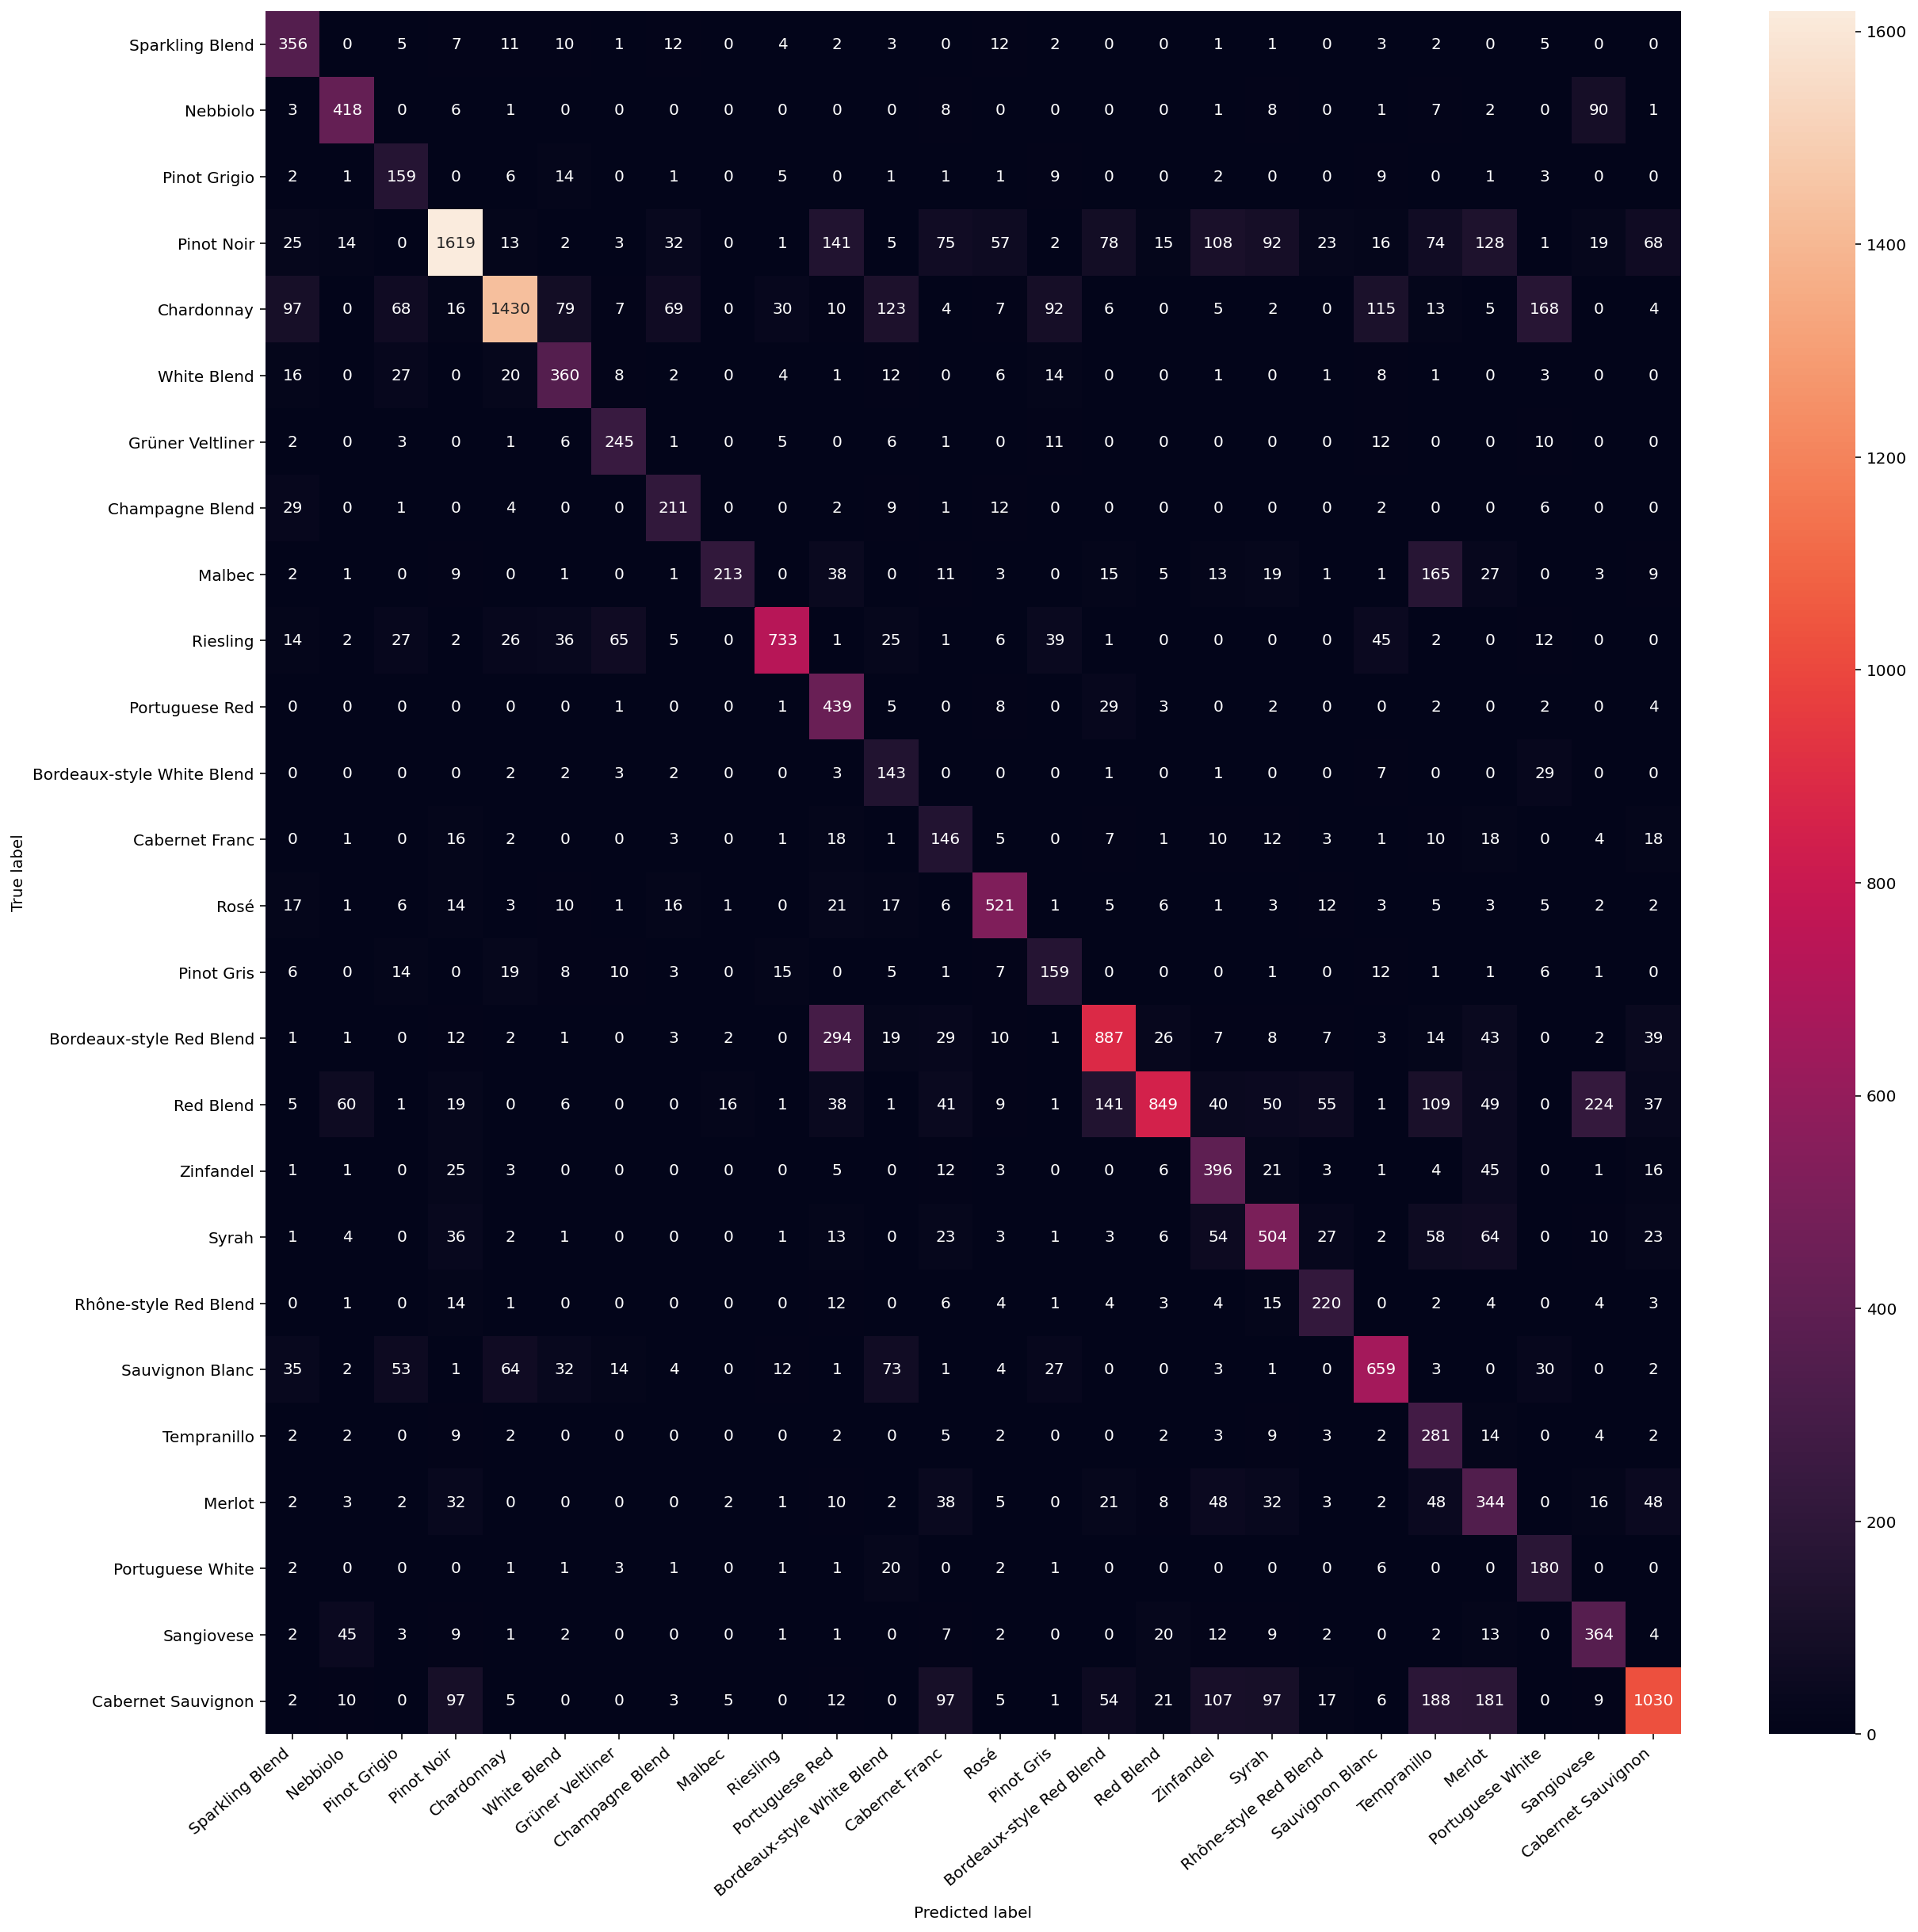

In [ ]:
# 히트맵으로 시각화 하기
fig, ax = plt.subplots(figsize=(20,20)) 
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=40, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [ ]:
# 학습된 모델로 예측 진행 해보기
sentences = [
  "fruity, citrusness red grapes taste",
  "Grapy plummy and juicy taste",
  "Classical red wine with minerality taste",
  "I love Sour herbal taste"
]

pred_tokens = map(tokenizer.tokenize, sentences)
pred_tokens = map(lambda tok: ["[CLS]"] + tok + ["[SEP]"], pred_tokens)
pred_token_ids = list(map(tokenizer.convert_tokens_to_ids, pred_tokens))

pred_token_ids = map(lambda tids: tids +[0]*(data.max_seq_len-len(tids)),pred_token_ids)
pred_token_ids = np.array(list(pred_token_ids))

predictions = model.predict(pred_token_ids).argmax(axis=-1)

for text, label in zip(sentences, predictions):
    print("text:", text, "\nintent:", w_classes[label])
    print()

text: fruity, citrusness red grapes taste 
intent: Rosé

text: Grapy plummy and juicy taste 
intent: Zinfandel

text: Classical red wine with minerality taste 
intent: Portuguese Red

text: I love Sour herbal taste 
intent: Sauvignon Blanc



In [ ]:
# 입력받아서 예측 츨력하기

wine = []
def find_your_taste_of(wine):
    while True:
        try:
            wine = [input("Find your wine(If you want to quit plese type 'quit'): ")]
            if wine == ['quit']:
                print('Thank you for your interest, we will find your tastes ;)')  
                break;                  
            else:
                pred_tokens = map(tokenizer.tokenize, wine)
                pred_tokens = map(lambda tok: ["[CLS]"] + tok + ["[SEP]"], pred_tokens)
                pred_token_ids = list(map(tokenizer.convert_tokens_to_ids, pred_tokens))

                pred_token_ids = map(lambda tids: tids +[0]*(data.max_seq_len-len(tids)),pred_token_ids)
                pred_token_ids = np.array(list(pred_token_ids))

                predictions = model.predict(pred_token_ids).argmax(axis=-1)

                for text, label in zip(wine, predictions):
                    print(f"Looking for ======'{text}'=======> \nRecommendation wine is [{w_classes[label]}]")
                    print()  
        except ValueError:
            print("Invalid")
            continue  

## What's your taste of WINE?
test

In [ ]:
find_your_taste_of(wine)
